**Problem 1:**

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd
from ISLP import load_data
df = load_data('Auto')
df = df[df['horsepower'].notna()]


In [24]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


In [14]:
df_sorted = df.sort_values(by='year', ascending=True)

df_sorted.head(100)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
hi 1200d,9.0,8,304.0,193,4732,18.5,70,1
dodge d200,11.0,8,318.0,210,4382,13.5,70,1
chevy c20,10.0,8,307.0,200,4376,15.0,70,1
ford f250,10.0,8,360.0,215,4615,14.0,70,1
...,...,...,...,...,...,...,...,...
opel manta,24.0,4,116.0,75,2158,15.5,73,2
audi 100ls,20.0,4,114.0,91,2582,14.0,73,2
volvo 144ea,19.0,4,121.0,112,2868,15.5,73,2


**(a). Calculating and adding mpg01**

In [35]:
#calculating the median mpg
median_mpg = df['mpg'].median()
print(f"Median mpg = {median_mpg}")

Median mpg = 22.75


In [36]:
#creating a variable 'mpg01' to assign 1 and 0 to the current mpg when compared with median_mpg
df['mpg01'] = np.where(df['mpg'] > median_mpg, 1, 0)

In [37]:
df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0
ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1,0
chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1,0
plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1,0
pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1,0


**(b). Plotting the dataset values against the new mpg01 variable**

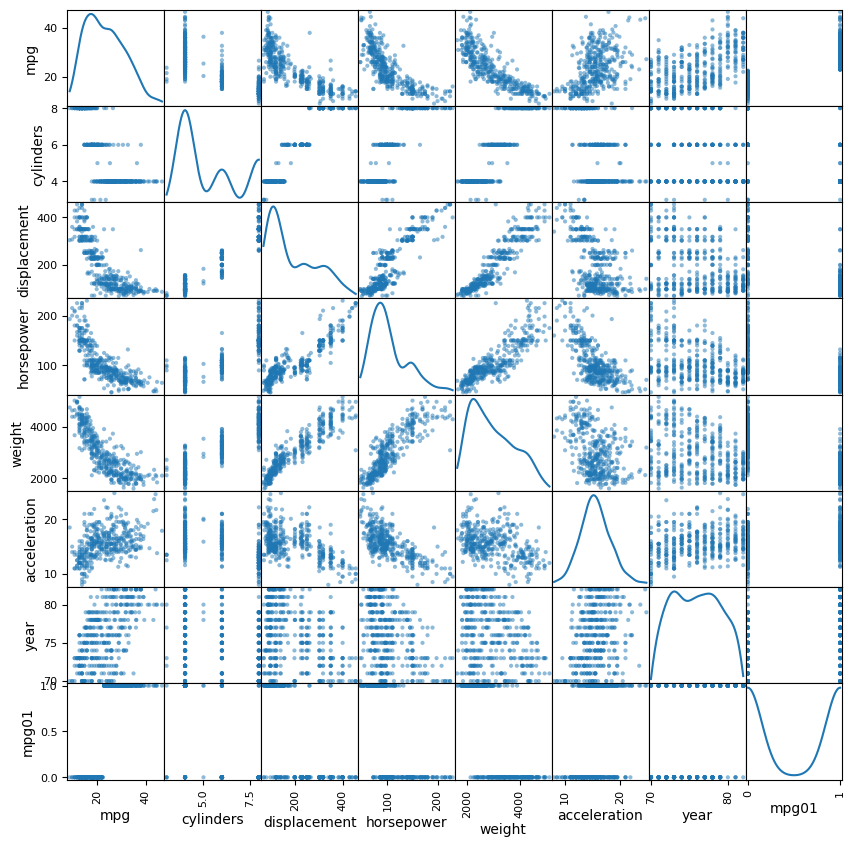

In [44]:
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

# Plot scatter matrix for these features with mpg01
pd.plotting.scatter_matrix(df[features + ['mpg01']], figsize=(10, 10), diagonal='kde')

# Show the plot
plt.show()

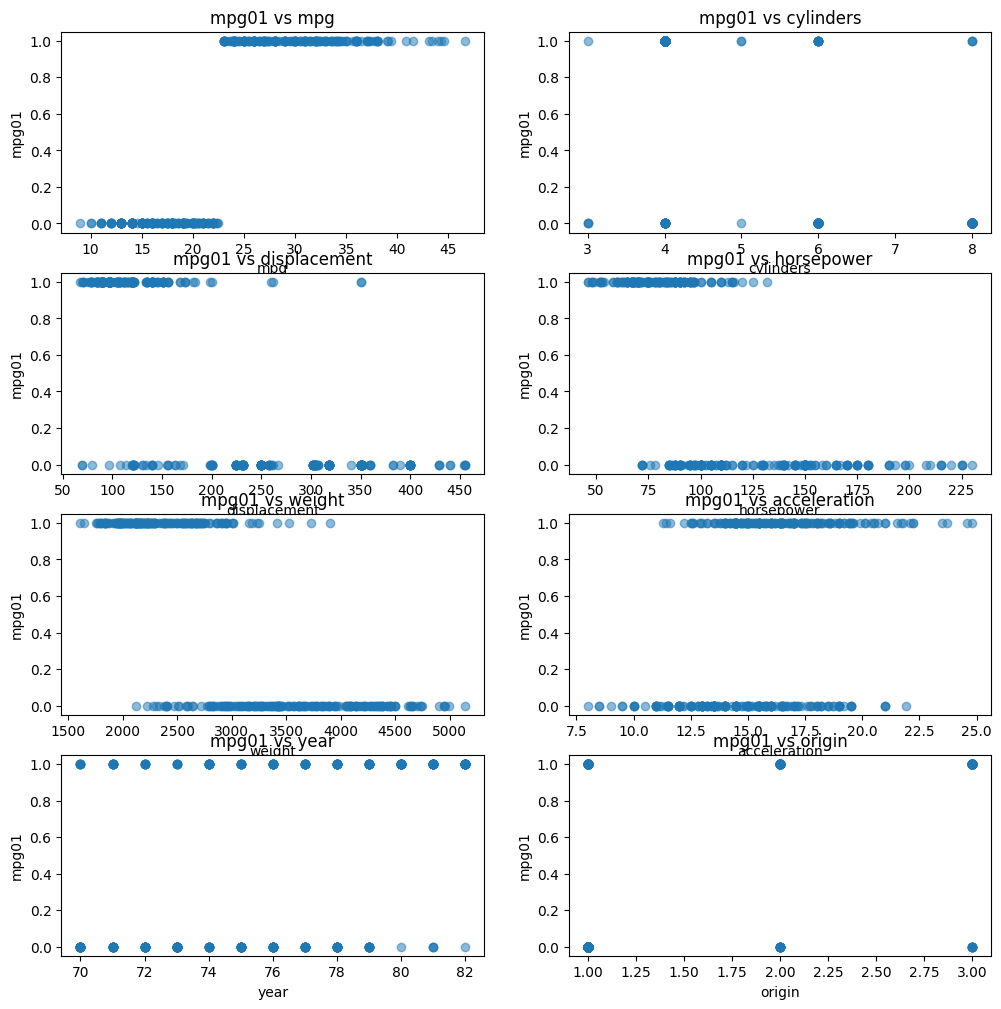

In [43]:
features_to_plot = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

# Create subplots for 'mpg01' against each of these features
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.flatten()

# Scatter plot for each feature
for i, feature in enumerate(features_to_plot):
    axes[i].scatter(df[feature], df['mpg01'], alpha=0.5)
    axes[i].set_title(f'mpg01 vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('mpg01')

# Adjust layout to prevent overlap
#plt.tight_layout()
plt.show()

**(c). Splitting into 20% test set and 80% training set**

In [50]:
#identifying features and target variable
features = ['cylinders', 'displacement', 'horsepower', 'weight']
target = 'mpg01'

In [51]:
#splitting into test and train
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**(d). Applying Logistic Regression Model to predict mpg01**

In [60]:
#ive edited the features array to contain only the 4 features required from the question
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
logreg = LogisticRegression(max_iter=1000)

In [62]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [63]:
y_pred = logreg.predict(X_test)

In [66]:
#Test error is a measure of how well a model performs on the unseen test data. It is calculated as 1 - accuracy. 
test_error = 1 - accuracy_score(y_test, y_pred)
test_error

0.10126582278481011

In [68]:
#we can use the predict_proba() function also to calcuate the test error. 
#the 2 values in each column is the individual probability of mpg01 value bing '0' and '1' respectively
#the sum of thses 2 values will be 1
y_proba = logreg.predict_proba(X_test)
print("First 5 predicted probabilities (class 0 and class 1):")
print(y_proba[:5])

First 5 predicted probabilities (class 0 and class 1):
[[0.02742839 0.97257161]
 [0.50633722 0.49366278]
 [0.00819869 0.99180131]
 [0.01736274 0.98263726]
 [0.25243334 0.74756666]]


**(e). Applying LDA on same features to predict mpg01.**

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [77]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [78]:
y_pred_lda = lda.predict(X_test)

In [79]:
test_error_lda = 1 - accuracy_score(y_test, y_pred_lda)
test_error_ldaexpla

0.10126582278481011

In [80]:
y_proba_lda = lda.predict_proba(X_test)
print("First 5 predicted probabilities (class 0 and class 1):")
print(y_proba_lda[:5])

First 5 predicted probabilities (class 0 and class 1):
[[0.02046014 0.97953986]
 [0.06881612 0.93118388]
 [0.00845405 0.99154595]
 [0.0114667  0.9885333 ]
 [0.08682247 0.91317753]]


**---------------------------------------------------------------------------------------------------------**

**Problem 2:**

**(a).**

Let us start by first explaining what "bootstrapping" is.
It is a sampling technique used to estimate the distribution of a dataset by randomly sampling by replacing with the original dataset.
When we dont have enough data in our dataset, we "resample" from the existing dataset to create new multiple boostrap samples; datasets. Each bootstrap sample is sampled from the original dataset at random, meaning there can be repetitions for specific datapoints while other datapoints may not even be considered. 

*Probability that the first bootstrap observation is not the first observation from the original sample.*


We know that the resampling from the original dataset happens at random. So for a dataset with 'n' observations, there is a 1/n chance that a specific observation may be sampled as the first observation in the resampled dataset. 
Consequently, there is a 1 - 1/n chance that that same observation may NOT be sampled.
And since the resampling process happens at random, the probability of any individual element being(or not being) selected will be the same, i.e (1-1/n)

*Probability that the last bootstrap observation is not the first observation from the original sampel.*

Since the selections/sampling from the original dataset is independent and happens at random, the probability reamins the same for both cases.
This is because that the selection process, as discusesd above, does not depend on any previously selected observations and happens at random. Therefore, the probability would be the same irregardless of which bootstrap observation index is in question. 
i.e the probaility would be (1-1/n)

**---------------------------------------------------------------------------------------------------------**

**Problem 3:**

In [85]:
df = load_data('College')

In [86]:
df.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [87]:
#creating the Accept.Rate variable
df['Accept.Rate'] = df['Accept'] / df['Apps']
df.head(5)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477


In [88]:
# and now we remove'accept' and 'apps'
df = df.drop(columns=['Accept', 'Apps'])
df.head(5)

,Private,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept.Rate
0,Yes,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169
1,Yes,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146
2,Yes,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207
3,Yes,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930
4,Yes,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477


**(a). Finding the population mean of 'Accept.Rate'**

In [91]:
mu = df['Accept.Rate'].mean()
print(mu)

0.7469277072775414


**(b). Finding Standard error of 'mu'**

In [95]:
#standard error can be calculated by doing standard deviation of mu/ sqrt of number of observations

n = len(df)
std_mu = df['Accept.Rate'].std()
std_error_mu = std_mu / np.sqrt(n)

print(std_error_mu)

0.005277323728707516


**(c). Stadnard error using bootsrap resampling for 1000 times.**

In [100]:
def bootstrap_mean(df, n_iterations=1000):
    bootstrap_means = []
    for _ in range(n_iterations):
        # Resample with replacement
        bootstrap_sample = df.sample(frac=1, replace=True)
        # Calculate the mean for the bootstrap sample
        mean_bootstrap = bootstrap_sample['Accept.Rate'].mean()
        bootstrap_means.append(mean_bootstrap)
    
    return np.std(bootstrap_means)
    
# Perform 1000 bootstrap resamples and estimate the standard error of the mean
bootstrap_standard_error_mu = bootstrap_mean(df, n_iterations=1000)

print("Bootstrap standard error of the mean is:", bootstrap_standard_error_mu)

Bootstrap standard error of the mean is: 0.005186764813914535


As you can see, my result for standard error is similar and comparable to our earlier result

The earlier method basically works by our above metnioned formula for standard error where the formula assumes that our data is drawn from a large population. This model assumes that our data is close to a normal distribution or large enough for the central limit theorem i.e where the sample mean would be distributed normally. 

In bootstrapping, it doesnt rely on distribution of the dataset and doesnt make any assumptions on the nature of the data. It will work well even in smaller sample sizes or even in datasets where the observations aren't distributed normally. It can be more robust but will be more computationally intensive.

Both of these produced very close values. THis may be indicative of the fact that our data behaves as expected under the assumptinos of the first method and it doesnt vary unusually. Thus the means of the data do not vary much even though we used two different methods (with different dependencies on the data) to arrive at the result.

**(d). Providing a confidence interval based on our earlier findings and the given formula**

from above we know that mean is : 0.7469277072775414

and that standard error is : 0.005186764813914535

plugging values into our confidence interval formula, we get,


    [ 0.7469277072775414 - 2 x 0.005186764813914535, 0.7469277072775414 + 2 x 0.005186764813914535 ]
    [0.7469 − 2 × 0.00519, 0.7469 + 2 × 0.00519]

    =
    
    [0.73652, 0.75728]

Therefore, we can say that the true average acceptance rate lies between 73.56% and 75.72%

**(e). Linear Regression to predict 'Accept.Rate' using Top10perc.**

In [102]:
import statsmodels.api as sm

*Let us first compute the standard errors using the statsmodels package and linear regression for end comparison*

In [113]:
X = df['Top10perc']
y = df['Accept.Rate']

In [114]:
#adding constant B0
X = sm.add_constant(X)

In [115]:
#fitting OLS 
model = sm.OLS(y, X).fit()

In [116]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Accept.Rate   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           9.56e-46
Time:                        19:14:20   Log-Likelihood:                 488.30
No. Observations:                 777   AIC:                            -972.6
Df Residuals:                     775   BIC:                            -963.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8569      0.009     99.597      0.0

In [117]:
se_intercept_statsmodels = model.bse[0]  # Standard error of intercept (B0)
se_slope_statsmodels = model.bse[1]  # Standard error of slope (B1 for Top10perc)

print("Standard Error of Intercept (B0) from statsmodels: ", se_intercept_statsmodels)
print("Standard Error of Slope (B1) from statsmodels: ", se_slope_statsmodels)

Standard Error of Intercept (B0) from statsmodels:  0.00860399673826016
Standard Error of Slope (B1) from statsmodels:  0.00026300038151207854


C:\Users\Jerin\AppData\Local\Temp\ipykernel_41832\2522266699.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_intercept_statsmodels = model.bse[0]  # Standard error of intercept (B0)
C:\Users\Jerin\AppData\Local\Temp\ipykernel_41832\2522266699.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  se_slope_statsmodels = model.bse[1]  # Standard error of slope (B1 for Top10perc)


*Now let us compute the same estimates using Bootstrapping*

In [120]:
def bootstrap_regression(df, n_iterations=1000):
    bootstrapped_betas = []
    for _ in range(n_iterations):
        # Resample with replacement
        bootstrap_sample = df.sample(frac=1, replace=True)
        
        # Define X and y for this bootstrap sample
        X_bootstrap = bootstrap_sample['Top10perc']
        y_bootstrap = bootstrap_sample['Accept.Rate']
        
        # Add constant for the intercept term
        X_bootstrap = sm.add_constant(X_bootstrap)
        
        # Fit the model on the bootstrap sample
        model_bootstrap = sm.OLS(y_bootstrap, X_bootstrap).fit()
        
        # Store the intercept (β0) and slope (β1)
        bootstrapped_betas.append(model_bootstrap.params.values)
    
    # Convert to a NumPy array for easy manipulation
    bootstrapped_betas = np.array(bootstrapped_betas)
    
    # Calculate the standard errors as the standard deviation of the bootstrapped coefficients
    se_intercept_bootstrap = np.std(bootstrapped_betas[:, 0])  # Standard error of intercept (β0)
    se_slope_bootstrap = np.std(bootstrapped_betas[:, 1])  # Standard error of slope (β1 for Top10perc)
    
    return se_intercept_bootstrap, se_slope_bootstrap

se_intercept_bootstrap, se_slope_bootstrap = bootstrap_regression(df)

print("Bootstrap SE of Intercept (B0): ",se_intercept_bootstrap)
print("Bootstrap SE of Slope (B1) for Top10perc: ",se_slope_bootstrap)

Bootstrap SE of Intercept (B0):  0.009690551924452213
Bootstrap SE of Slope (B1) for Top10perc:  0.0003410064670082615


Here we can compare the results:

The SE for Interncept(B0) for statsmodels is **0.00860** while for bootstrap is **0.00969**. Here, the bootstrap gives a slightly larger error. This may be because its capturing some additional variance in the data that the other method couldn't pick up due to it assuming normal distribution of errors.

The SE for Slope(B1) for statsmodels is **0.000263** while for bootstrap is **0.000341**. Here again there is a slightly larger error picked up by the bootstrapping method. 

This closeness but difference in values can be because the statsmodels assumes the errors are normally distributed within the data. Bootstrap doesnt make any assumptions and just calculates on the resampled data. Thus, it is able to capture more vairance within the dataset that the other doesnt pick up.

**(f). Using KNN regression to predict Accept.Rate with neighrbors K = 10**

*Applying KNN to this for Top10perc = 76*

In [121]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample

In [122]:
X = df[['Top10perc']]  # Predictor (Top10perc)
y = df['Accept.Rate']  # Response (Accept.Rate)

In [123]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

In [132]:
pred_accept_rate = knn.predict([[76]])
print("Predicted Accept.Rate when Top10perc = 76: ", pred_accept_rate[0])

# top10perc_input = pd.DataFrame([[76]], columns=['Top10perc'])

# # Now make the prediction
# pred_accept_rate = knn.predict(top10perc_input)
# print("Predicted Accept.Rate when Top10perc = 76: ", pred_accept_rate[0])

Predicted Accept.Rate when Top10perc = 76:  0.4108493633178251


D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [134]:
top10perc_input = pd.DataFrame([[76]], columns=['Top10perc'])

# Now predict the Accept.Rate when Top10perc = 76 using the correct DataFrame structure
pred_accept_rate = knn.predict(top10perc_input)

print("Predicted Accept.Rate when Top10perc = 76: ", pred_accept_rate[0])

Predicted Accept.Rate when Top10perc = 76:  0.4797281738119337


*Computing using Bootstrapping*

In [135]:
n_bootstrap_samples = 1000
bootstrap_predictions = []

for _ in range(n_bootstrap_samples):
    # Resample the dataset with replacement
    X_resampled, y_resampled = resample(X, y, replace=True)
    
    # Fit the KNN model on the resampled data
    knn.fit(X_resampled, y_resampled)
    
    # Predict the Accept.Rate for Top10perc = 76 in this bootstrap sample
    pred_bootstrap = knn.predict([[76]])
    bootstrap_predictions.append(pred_bootstrap[0])

# Convert to a NumPy array for easier manipulation
bootstrap_predictions = np.array(bootstrap_predictions)

# Compute the standard error (standard deviation of bootstrap predictions)
bootstrap_se = np.std(bootstrap_predictions)

print(f"Bootstrap Standard Error of the prediction when Top10perc=76: {bootstrap_se}")

D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with featu

Bootstrap Standard Error of the prediction when Top10perc=76: 0.03193158566764034


D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
D:\Apps\Py\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with featu